In [255]:
import numpy as np
import matplotlib.pyplot as plt

#### Create white noise

In [256]:
n_turns = 1000
turns = np.arange(n_turns)
DeltaT = turns[1] - turns[0]  # sampling interval = 1
fs = 1 / DeltaT  # sampling frequency
f = np.linspace(0, fs, n_turns)  # 1/T = frequency

mu, stdPhaseNoise = 0, 0.01
y = np.random.normal(mu, stdPhaseNoise, len(turns))

Text(0.5, 1.0, 'Noise signal')

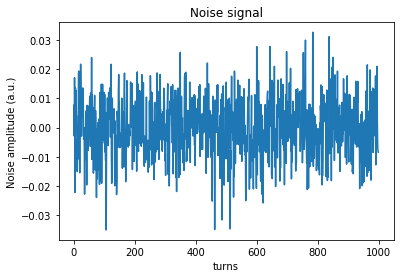

In [257]:
plt.plot(turns, y)
plt.xlabel('turns')
plt.ylabel('Noise amplitude (a.u.)')
plt.title('Noise signal')

Text(0.5, 1.0, 'Noise spectrum')

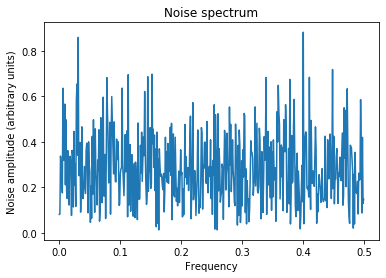

In [258]:
# The spectrum is mirrored around N/2.
# Thus we plot only half of the spcetrum as is the only one giving us real information.
my_fft_1 = np.fft.fft(y)
plt.plot(f[:n_turns // 2], np.abs(my_fft_1[:n_turns // 2]))
plt.xlabel('Frequency')
plt.ylabel('Noise amplitude (arbitrary units)')
plt.title('Noise spectrum')

#### Analysis in chunks to "clear"  the signal

    1) Chunk the noise signal in 1e4 chunks of 1000 turns.  (>1e4 chunks limited from the cell's execution time).
    2) Perform the FFT in every one of them. 
    3) Average the abs() FFTs. 

In [261]:
n_chunks = int(1e4)
N = 1000
turns = np.arange(N * n_chunks)

DeltaT = turns[1] - turns[0]  # sampling interval = 1
fs = 1 / DeltaT *43.45e3 *2  # sampling frequency
f = np.linspace(0, fs, N)  # 1/T = frequency

mu, stdPhaseNoise = 0, 1e-8
y = np.random.normal(mu, stdPhaseNoise, len(turns))

In [262]:
# chunk the signal using list comprehension
y_list = list(y)
my_chunks = [y_list[i:i + N] for i in range(0, len(y), N)]

fft_array = np.ones((n_chunks, N))  # keep the fft of each chunk

# Averaged FFT computation
for i in range(n_chunks):
    signal = my_chunks[i]
    my_fft = np.fft.fft(signal)  # type: numpy.array
    fft_array[i] = np.abs(my_fft)

In [263]:
averaged_fft = np.mean(fft_array, axis=0)

#### Keep only half the spectrum

In [264]:
averaged_fft_norm = averaged_fft/len(averaged_fft) # normalise with the signal's length

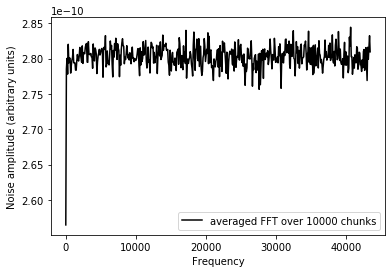

In [265]:
plt.plot(f[:N // 2], averaged_fft_norm[:N // 2], color='k', label='averaged FFT over {} chunks'.format(n_chunks))
plt.xlabel('Frequency')
plt.ylabel('Noise amplitude (arbitrary units)')
plt.legend()
plt.show()

#### **Compare with the case where 1 chunk is used**
Indeed the signal is more "clear"

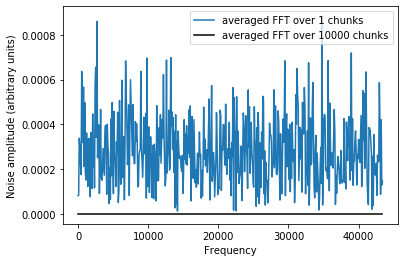

In [266]:
plt.plot(f[:n_turns // 2], np.abs(my_fft_1[:n_turns // 2])/len(my_fft_1), color='C0', label='averaged FFT over {} chunks'.format(1))
plt.plot(f[:n_turns // 2], averaged_fft_norm[:n_turns // 2], color='k', label='averaged FFT over {} chunks'.format(n_chunks))
plt.xlabel('Frequency')
plt.ylabel('Noise amplitude (arbitrary units)')
plt.legend()
plt.show()

#### **Compute and plot the power spectral density**

From : https://en.wikipedia.org/wiki/Spectral_density


In [267]:
Sxx = N*averaged_fft_norm**2/fs# for half of the spectrum values

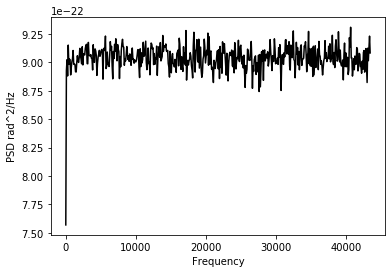

In [268]:
plt.plot(f[:N // 2], Sxx[:N // 2], color='k')
plt.xlabel('Frequency')
plt.ylabel('PSD rad^2/Hz')
plt.show()

#### **Compute the total power** 
Summation of the spectral components yields the total power (for a physical process) or variance (in a statistical process).

In [272]:
total_power = np.mean(Sxx)
print(total_power)

9.03789253163474e-22


In [271]:
var = stdPhaseNoise**2
print('variance = {}'.format(var))

variance = 1.0000000000000001e-16


In [ ]:
total_power/0.5